# Moondream 1.9B
- Announcement: https://moondream.ai/blog/introducing-a-new-moondream-1-9b-and-gpu-support
- Playground: https://moondream.ai/playground
- Moondream Cloud: https://console.moondream.ai/
- Documentation: https://docs.moondream.ai/quick-start
- HuggingFace: https://huggingface.co/vikhyatk/moondream2

Code according to: https://docs.moondream.ai/quick-start

In [1]:
!pip install pyvips-binary pyvips

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Installing backend dependencies ... one
  Preparing metadata (pyproject.toml) ... one
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 24.4 MB/s eta 0:00:000:00:01
  Created wheel for pyvips: filename=pyvips-2.2.3-py2.py3-none-any.whl size=54910 sha256=bdae27d53a17dc8e4a38fb05c1533f656c9a3f1f3f7dcad2ed258461159b6fde
  Stored in directory: /home/codespace/.cache/pip/wheels/f8/70/6e/576099b6eaf9bee1073262571b24d9a850b1d0f3451434506b
Successfully built pyvips

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


To avoid: `/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html from .autonotebook import tqdm as notebook_tqdm` I'm installing also `ipywidgets`

In [5]:
pip install --upgrade ipywidgets jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer # pip install transformers
from PIL import Image

To execute `model = AutoModelForCausalLM.from_pretrained` there's necessary also `einops` package

In [8]:
!pip install einops


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2", # https://huggingface.co/vikhyatk/moondream2
    revision="2025-01-09",
    trust_remote_code=True,
    # Uncomment to run on GPU.
    # device_map={"": "cuda"}
)

In [11]:
import requests
from io import BytesIO

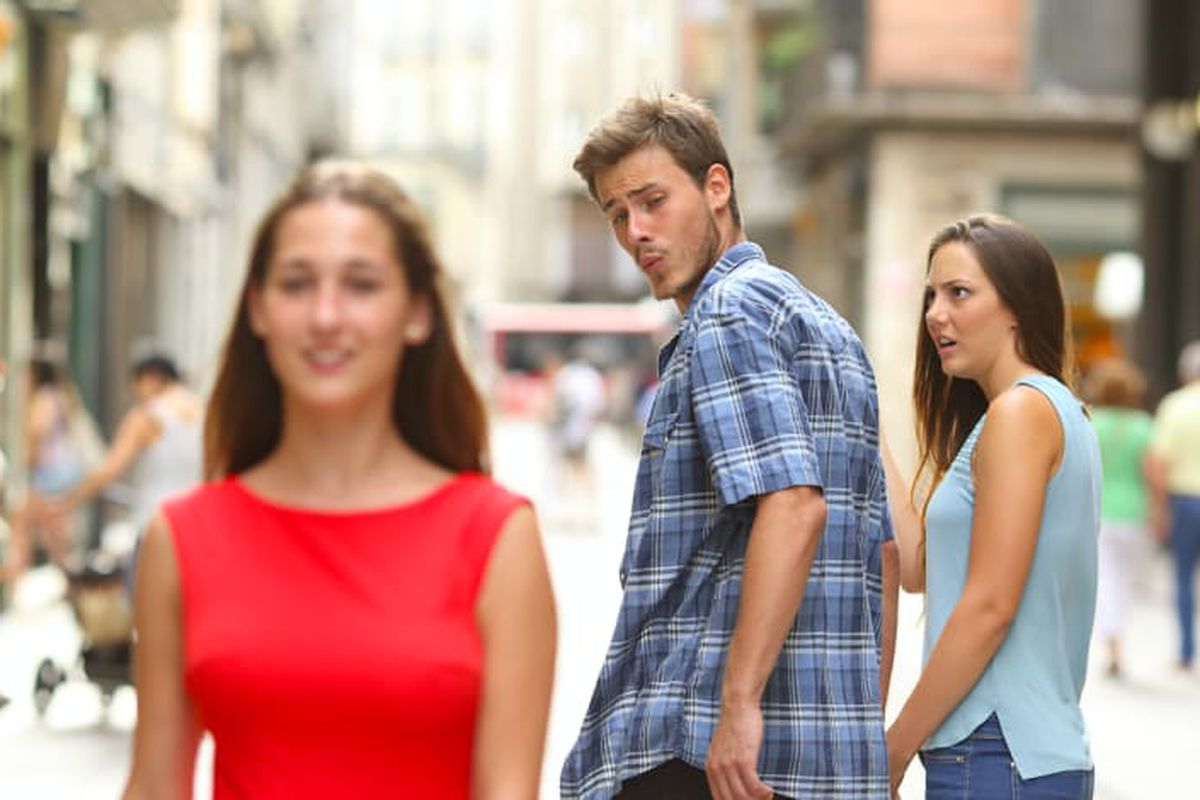

In [25]:
# Load image #1
url1 = "https://imgflip.com/s/meme/Distracted-Boyfriend.jpg"

response1 = requests.get(url1)

image1 = Image.open(BytesIO(response1.content))
image1.show()

In [15]:
encoded_image1 = model.encode_image(image1)  # Encode image (recommended for multiple operations)

## Captioning

In [16]:
print(model.caption(encoded_image1, length="short")["caption"]) # "short" or "normal" (default)

 A young man in a blue plaid shirt and a young woman in a red dress stand in a bustling city street, with a blurred background of people and buildings.


In [17]:
print(model.caption(encoded_image1, length="normal")["caption"]) # "short" or "normal" (default)

 The image shows a young man in a blue and white plaid shirt and a young woman in a red dress walking down a busy city street. The man is looking back over his shoulder, while the woman is looking ahead. The background is blurred, suggesting a shallow depth of field, and shows other people walking on the street. The man's expression appears to be a mix of surprise and concern, while the woman's expression is neutral.


## Query any image

In [18]:
answer = model.query(encoded_image1, "What woman in a blue blouse is doing?")["answer"]
print("\nAnswer:", answer)  # Single response


Answer:  The woman in a blue blouse is looking at the man in the plaid shirt, who is walking away from her.


## Detect any object

In [19]:
detect_result = model.detect(encoded_image1, "How many long haired women are in this picture?")
print("\nDetected:", detect_result["objects"])


Detected: [{'x_min': 0.7568359375, 'y_min': 0.2578125, 'x_max': 0.9228515625, 'y_max': 0.62890625}]


Detected only one woman (see picture below)

**Draw a rectangle on a detected person**

In [20]:
from PIL import ImageDraw

In [23]:
width, height = image1.size
print(f"width: {width}, height: {height}")

width: 1200, height: 800


In [26]:
image1_copy = image1.copy()
draw = ImageDraw.Draw(image1_copy)

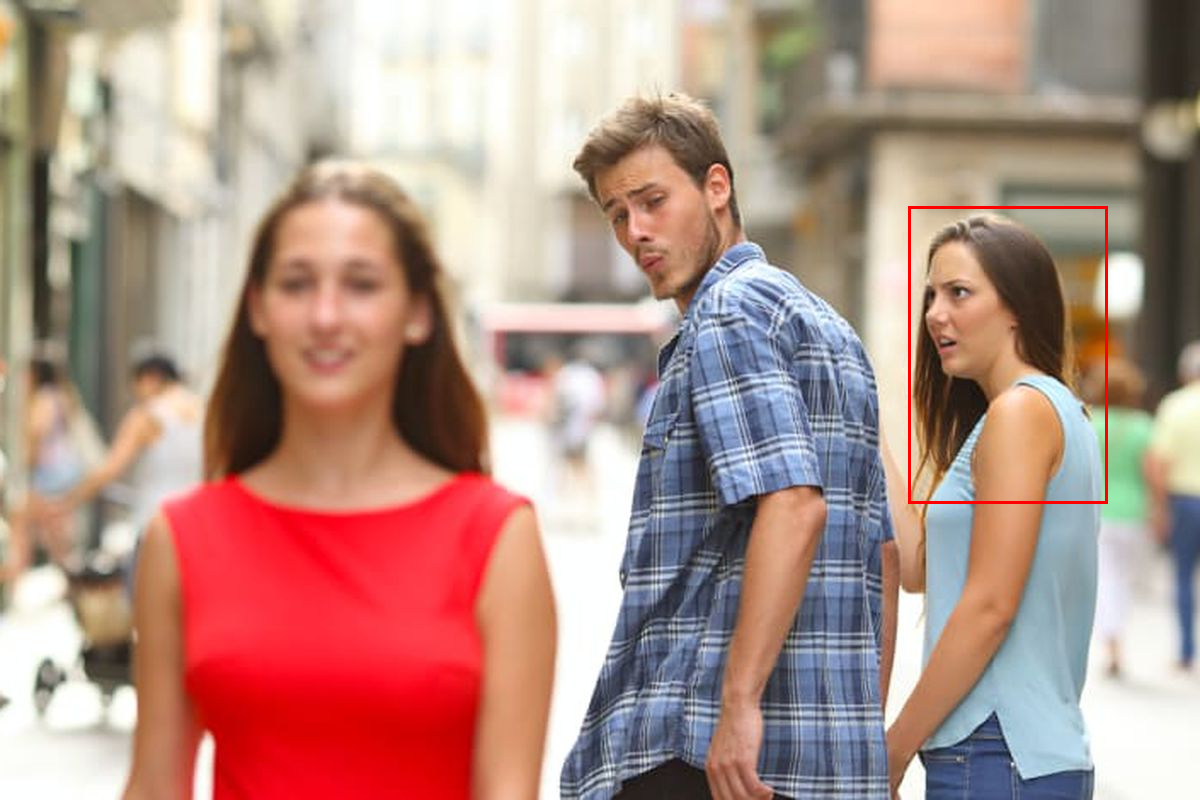

In [28]:
for obj in detect_result["objects"]:
    x_min = int(obj['x_min'] * width)
    y_min = int(obj['y_min'] * height)
    x_max = int(obj['x_max'] * width)
    y_max = int(obj['y_max'] * height)

    # Draw rectangle (red, thickness 3)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

# Show the modified image
image1_copy.show()

## Point at any object

In [31]:
point_result = model.point(encoded_image1, "How many arms do you see in this picture?")
print("Points:", point_result["points"])

Points: [{'x': 0.1259765625, 'y': 0.849609375}, {'x': 0.423828125, 'y': 0.849609375}, {'x': 0.6328125, 'y': 0.7978515625}, {'x': 0.802734375, 'y': 0.7724609375}, {'x': 0.7451171875, 'y': 0.7197265625}, {'x': 0.9794921875, 'y': 0.5751953125}, {'x': 0.9560546875, 'y': 0.5751953125}, {'x': 0.4990234375, 'y': 0.5166015625}, {'x': 0.4453125, 'y': 0.5166015625}, {'x': 0.1494140625, 'y': 0.5498046875}, {'x': 0.0615234375, 'y': 0.5751953125}]


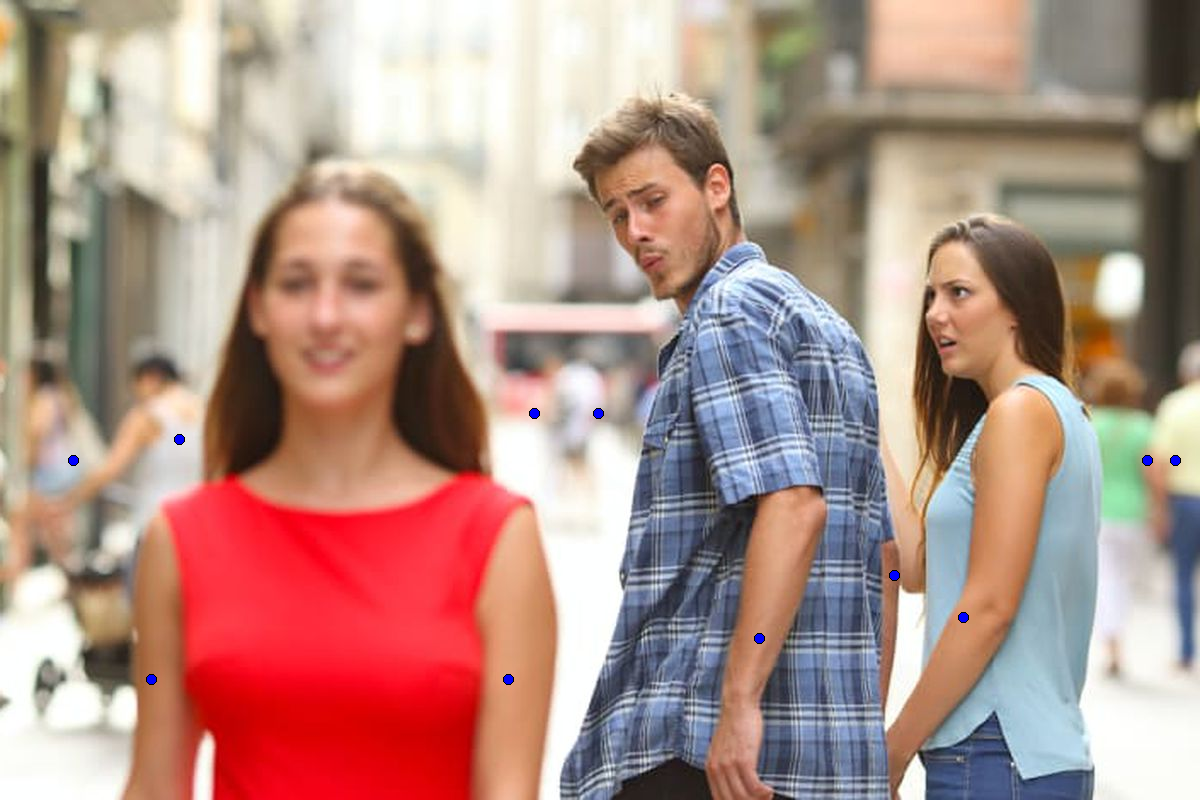

In [32]:
image2_copy = image1.copy()
draw = ImageDraw.Draw(image2_copy)

# Set point size
radius = 5

# Draw each point
for point in point_result["points"]:
    x = int(point['x'] * width)
    y = int(point['y'] * height)
    
    # Draw a small circle (dot)
    draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill="blue", outline="black")

# Show the modified image
image2_copy.show()

## Gaze detection

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Detect faces
    # from https://github.com/vikhyat/moondream/blob/main/recipes/gaze-detection-video/gaze-detection-video.py#L223
detection_result_faces = model.detect(encoded_image1, "face")
print("\nDetected:", detection_result_faces["objects"])


Detected: [{'x_min': 0.4931640625, 'y_min': 0.19189453125, 'x_max': 0.5869140625, 'y_max': 0.36669921875}, {'x_min': 0.759765625, 'y_min': 0.3037109375, 'x_max': 0.8359375, 'y_max': 0.4716796875}, {'x_min': 0.2138671875, 'y_min': 0.2626953125, 'x_max': 0.3349609375, 'y_max': 0.5126953125}]


In [34]:
# Sort faces by x_min coordinate for stable colors
    # from: https://github.com/vikhyat/moondream/blob/main/recipes/gaze-detection-video/gaze-detection-video.py#L104
faces = sorted(detection_result_faces["objects"], key=lambda f: (f["y_min"], f["x_min"]))
faces

[{'x_min': 0.4931640625,
  'y_min': 0.19189453125,
  'x_max': 0.5869140625,
  'y_max': 0.36669921875},
 {'x_min': 0.2138671875,
  'y_min': 0.2626953125,
  'x_max': 0.3349609375,
  'y_max': 0.5126953125},
 {'x_min': 0.759765625,
  'y_min': 0.3037109375,
  'x_max': 0.8359375,
  'y_max': 0.4716796875}]

In [40]:
image2_copy = image1.copy()
draw = ImageDraw.Draw(image2_copy)

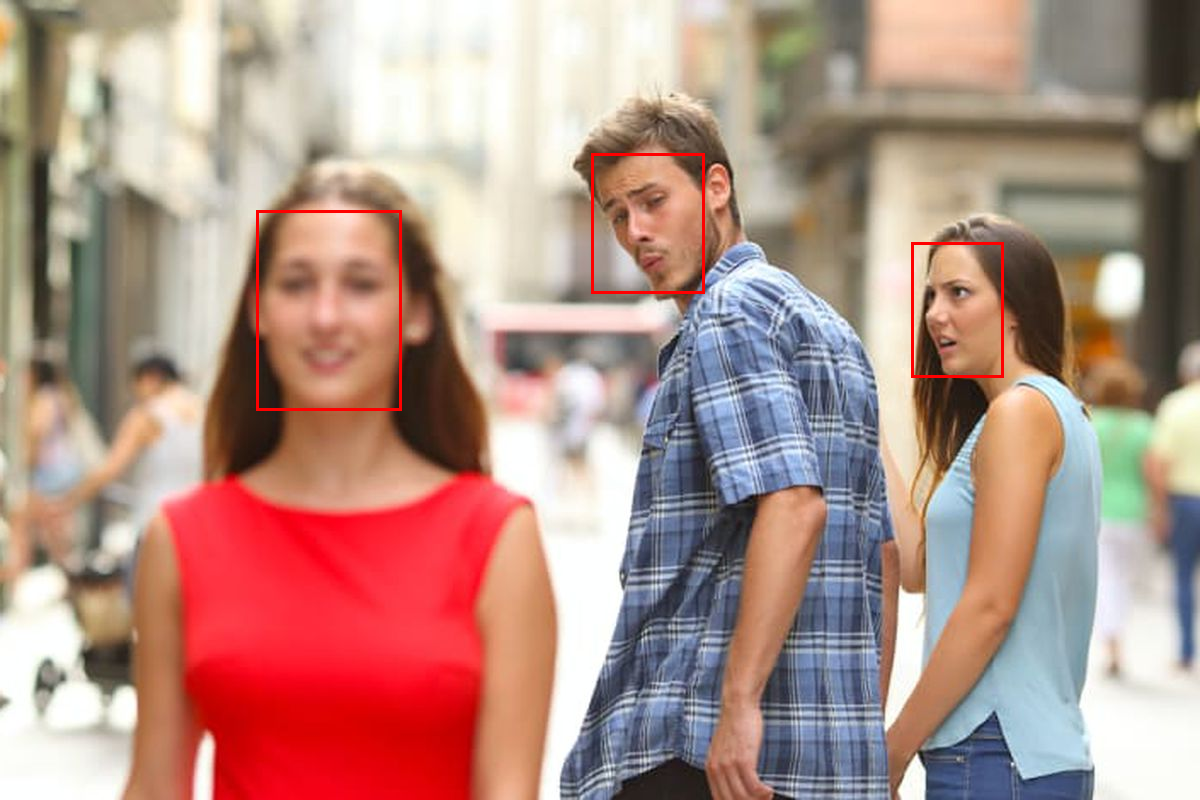

In [39]:
image2_copy = image1.copy()
draw = ImageDraw.Draw(image2_copy)

for obj in faces:
    x_min = int(obj['x_min'] * width)
    y_min = int(obj['y_min'] * height)
    x_max = int(obj['x_max'] * width)
    y_max = int(obj['y_max'] * height)

    # Draw rectangle (red, thickness 3)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

# Show the modified image
image2_copy.show()


In [38]:
# Generate colors
colors = plt.cm.rainbow(np.linspace(0, 1, max(1, len(faces))))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

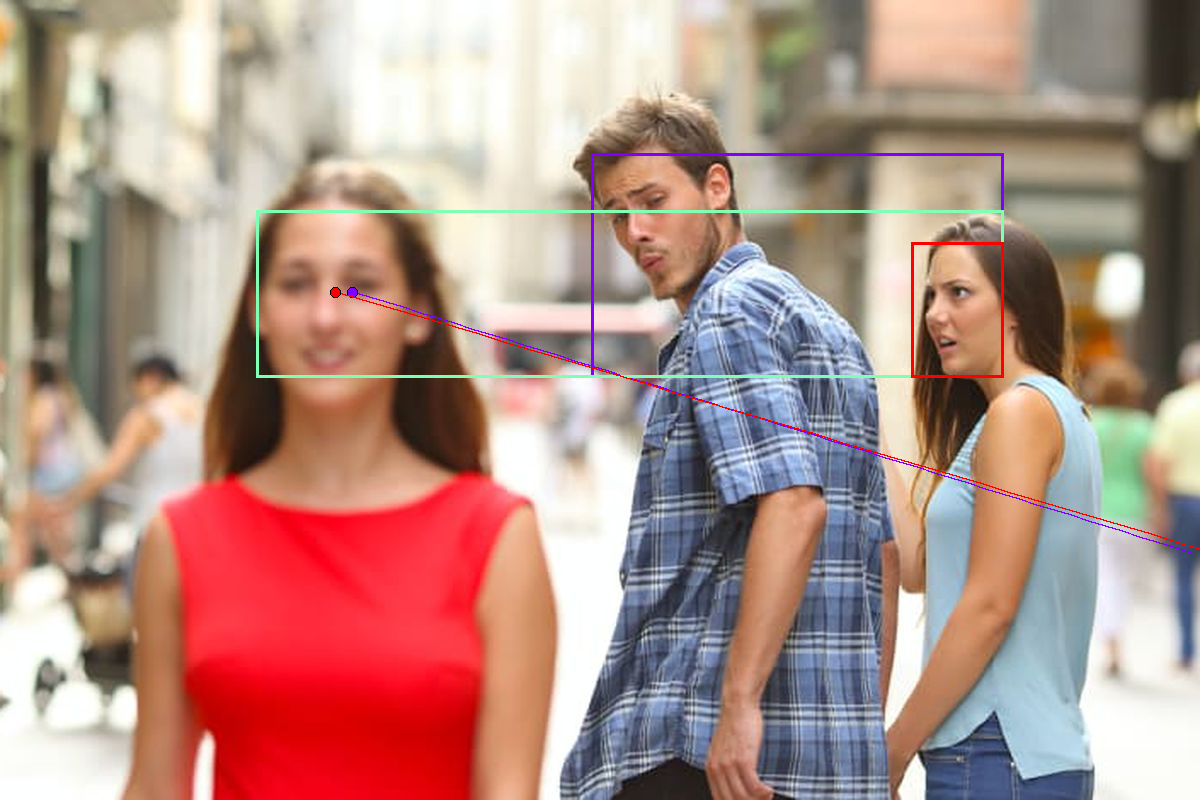

In [41]:
# Process each face
for face, color in zip(faces, colors):
    try:
        # Calculate face box coordinates
        x_min = int(float(face["x_min"]) * width)
        y_min = int(float(face["y_min"]) * height)

        # Draw face bounding box
        face_color = tuple(int(c * 255) for c in color[:3])  # Convert color from (0-1) to (0-255)
        draw.rectangle([x_min, y_min, x_max, y_max], outline=face_color, width=3)
        
        # Calculate face center
        face_center = (
            float(face["x_min"] + face["x_max"]) / 2,
            float(face["y_min"] + face["y_max"]) / 2,
            )
        
        # Try to detect gaze
        try:
            gaze_result = model.detect_gaze(encoded_image1, face_center)
            if isinstance(gaze_result, dict) and "gaze" in gaze_result:
                gaze = gaze_result["gaze"]
            else:
                gaze = gaze_result
        except Exception as e:
            print(f"Error detecting gaze: {e}")
            continue
        
        if (
            gaze is not None
            and isinstance(gaze, dict)
            and "x" in gaze
            and "y" in gaze
            ):
            gaze_x = int(float(gaze["x"]) * width)
            gaze_y = int(float(gaze["y"]) * height)
            face_center_x = x_min + width // 2
            face_center_y = y_min + height // 2
            
            # Draw gaze line with gradient effect
            points = 50
            alphas = np.linspace(0.8, 0, points)
            
            # Calculate points along the line
            x_points = np.linspace(face_center_x, gaze_x, points)
            y_points = np.linspace(face_center_y, gaze_y, points)
            
            # Draw gradient line segments
            for i in range(points - 1):
                alpha = int(255 * alphas[i])  # Convert to 0-255
                segment_color = (face_color[0], face_color[1], face_color[2], alpha)  # RGBA

                # Draw segment line
                draw.line([(x_points[i], y_points[i]), (x_points[i + 1], y_points[i + 1])], fill=segment_color, width=2)

            # Draw gaze point
            radius = 5  # Size of gaze point
            draw.ellipse([gaze_x - radius, gaze_y - radius, gaze_x + radius, gaze_y + radius], fill=face_color, outline="black")

    except Exception as e:
        print(f"Error processing face: {e}")
        continue

# Show the modified image
image2_copy.show()